Алгоритм DBSCAN. Розрахувати додатковий результат кластеризацiї:
estimated number of noise points.

Метрики якостi: Adjusted Mutual Information, Silhouette Coefficient, Calinski-
Harabasz Index.

Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, calinski_harabasz_score
import pandas as pd

>***Алгоритм DBSCAN.***

DBSCAN - алгоритм кластеризації на основі щільності, який часто використовується для нелінійних або несферичних наборів даних. Епсилон і мінімальна кількість точок – це два обов’язкові параметри. Епсилон — максимальна відстань між двома точками, щоб вважати їх сусідами. Мінімальна кількість кількість сусідів, яка має бути у точки в цьому околі, щоб вважати її основною (core point).


***Опис метрик:***

1.   **Adjusted Mutual Information**: AMI(U, V) = $\frac{MI(U, V) - E(MI(U, V))} {avg(H(U), H(V)) - E(MI(U, V))}$, це варіація метрики MI, що порівнює 2 кластери U,V (є мірою подібності 2 міток для однаковиx даниx).
Вона симетрична, не залежить від значень та перестановок міток. Визначається з використанням функції ентропії, інтерпретуючи розбиття вибірки, як дискретні розподіли. Інтуїтивно: наскільки інформація про один кластер зменшує невизначеність щодо іншого. Верхня межа: 1.
2.   **Silhouette Coefficient**: $\frac{b-a}{max(a, b)}$, де a – середня внутрішньокластерна відстань, b – середня відстань до найближчого сусіднього кластера. Значення в діапазоні [-1, 1], від'ємні значення вказують на помилкове присвоєння певному кластеру, близькі до нуля значення характерні для кластерів, що перекриваються.
3. **Calinski-Harabasz Index** - відношення суми дисперсії між кластерами та дисперсії всередині кластера для всіх кластерів (дисперсія-сума квадратів відстаней). Чим вища оцінка, тим краще визначені кластери.

Зауважимо: 2 і 3 метрики дають кращі результати для опуклих кластерів ніж, наприклад, отриманих на основі щільності



In [ ]:
labels_true = [0,0,0,0]
labels_pred = [1,2,3,4]
print(adjusted_mutual_info_score(labels_true, labels_pred))
labels_pred = [1,1,1,1]
adjusted_mutual_info_score(labels_true, labels_pred)  

0.0


1.0

Функції, що знадобляться в роботі

In [ ]:
def plot_clusters(data, labels, colors='viridis'):
  """
  Будуємо кластери, отримані з моделі, в 2D
  """
  plt.figure(figsize=(7,5))
  plt.title("Clusters by DBSCAN")
  plt.scatter(data[:,0], data[:,1], c=labels, marker="^", cmap = colors)
  plt.show()


def metrics(data, labels_true, labels_pred):
  """
  Функції обчислення 3 метрик
  """
  print("Adjusted Mutual Info: %0.3f" % adjusted_mutual_info_score(labels_true, labels_pred))
  if(len(set(labels_pred)) - (1 if -1 in labels_pred else 0)>=2):
    print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels_pred))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(data, labels_pred))


def number_of_noise_pts(model):
  """
  Оцінена моделлю кількість шумових точок
  """
  labels = model.labels_
  n_noise_ = list(labels).count(-1)
  print("Estimated number of noise points: %d" % n_noise_)


def number_of_clusters(model):
  """
  Оцінена моделлю кількість кластерів
  """
  labels = model.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print("Estimated number of clusters: %d" % n_clusters_)

Дані будемо стандартизувати, оскільки DBSCAN використовує евклідову відстань між точками для визначення сусідства, немасштабовані дані створили б проблему.

Візуалізуємо перший датасет та бачимо, що один кластер "лежить" в іншому, тому виділити їх буде практично неможливо даним алгоритмом.

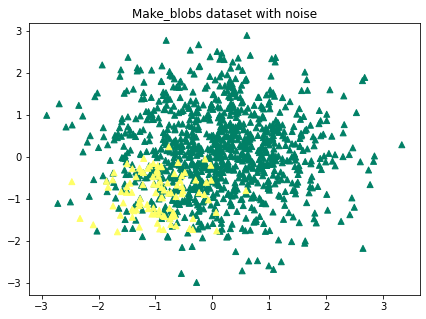

In [ ]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [-2.0, -2.0]]
clusters_std = [2.0, 1.0]
X, y = make_blobs(n_samples=[n_samples_1 , n_samples_2] , centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# масштабуємо та центруємо дані
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(7,5))
plt.title("Make_blobs dataset with noise")
plt.scatter(X[:, 0], X[:, 1], c=y, marker="^", cmap='summer')
plt.show()

Будуємо модель й бачимо, що або вона виділяє один кластер. Альтернативні працюватимуть так само, варіюватиметься кількість шумових точок та зайвих кластерів.

Estimated number of clusters: 8
Estimated number of noise points: 76
Adjusted Mutual Info: 0.001
Silhouette Coefficient: -0.178
Calinski-Harabasz Index: 8.244


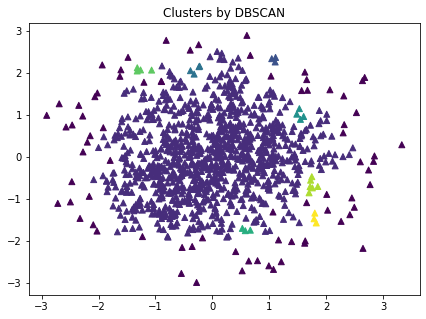

Estimated number of clusters: 1
Estimated number of noise points: 0
Adjusted Mutual Info: -0.000


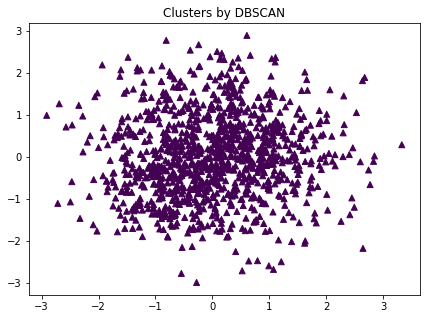

In [ ]:
DBmodel1 = DBSCAN(
          eps=0.2, # максимальна відстань між двома точками, щоб вважати їх сусідами
          min_samples=3 # кількість сусідів, яка має бути у точки в цьому околі, щоб вважати її основною
          ).fit(X)    

number_of_clusters(DBmodel1)
number_of_noise_pts(DBmodel1)
metrics(X, y, DBmodel1.labels_)
plot_clusters(X, DBmodel1.labels_, colors='viridis')

DBmodel1_alt = DBSCAN(
          eps=1,
          min_samples=4
          ).fit(X)    
core_samples_mask = np.zeros_like(DBmodel1.labels_, dtype=bool)
core_samples_mask[DBmodel1.core_sample_indices_] = True

number_of_clusters(DBmodel1_alt)
number_of_noise_pts(DBmodel1_alt)
metrics(X, y, DBmodel1_alt.labels_)
plot_clusters(X, DBmodel1_alt.labels_, colors='viridis')

Візуалізуємо другий датасет. Бачимо кластери кулястої форми та різної дисперсії, причому 3 з них погано роздільні

In [ ]:
np.random.seed(0)
n_points_per_cluster = 300
C1 = [-6, -2] + 0.7*np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3*np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2*np.random.randn(n_points_per_cluster, 2)
C4 = [4, -4] + 0.1*np.random.randn(n_points_per_cluster, 2)
C5 = [5 , 0] + 1.4*np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0*np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

# штучний масив міток для 6 класів
y = np.full((1800), 1, dtype=int)
for i,j in zip(range(300, 1800, 300),range(2,7)):
  y[i:i+300]=j

# масштабування, центрування масиву
scaler = StandardScaler()
X = scaler.fit_transform(X)

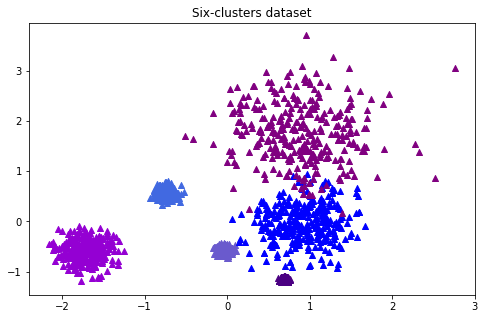

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Six-clusters dataset")
for i, j in zip([C1, C2, C3, C4, C5, C6], ['darkviolet','royalblue','slateblue','indigo','blue','purple']):
  plt.scatter(scaler.transform(i)[:,0], scaler.transform(i)[:,1], marker="^", c=j)
plt.show()

Estimated number of clusters: 34
Estimated number of noise points: 91
Adjusted Mutual Info: 0.829
Silhouette Coefficient: 0.473
Calinski-Harabasz Index: 592.394


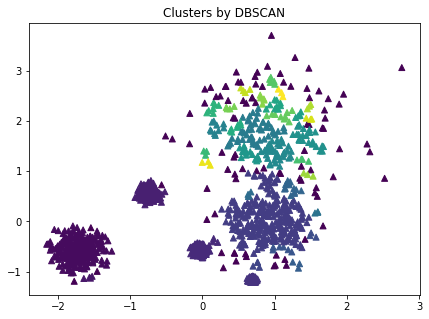

In [ ]:
DBmodel2 = DBSCAN(
          eps=0.1, # максимальна відстань між двома точками, щоб вважати їх сусідами.
          min_samples=3 # кількість сусідів, яка має бути у точки в цьому околі, щоб вважати її основною
          ).fit(X)    

number_of_clusters(DBmodel2)
number_of_noise_pts(DBmodel2)

metrics(X, y, DBmodel2.labels_)
plot_clusters(X, DBmodel2.labels_, colors='viridis')

Можемо побачити, що DBSCAN не виокремлює два найбільші кластери. Це пояснюється тим, що щільність межі між ними не менше щільності найменш щільного кластера. Алгоритм бачить "форму" на основі однакової щільності, але не виокремлює опуклі кластери.

In [ ]:
import itertools

eps_values = np.arange(0.1,1,0.1)
# для min_samples мінімальне значення 3, також розглянемо 4, але більше брати немає сенсу:
# це підвищить кількість шумових точок, знизить інформативність
min_samples = np.arange(3,5,1)
# декартовий добуток для 2 параметрів
dbscan_params = list(itertools.product(eps_values, min_samples))

# параметри датафрейму для аналітики різних моделей
n_clusters = []
scores1 = []
scores2 = []
epsvalues = []
min_samp = []
noise_pts = []

for p in dbscan_params:
    clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    epsvalues.append(p[0])
    min_samp.append(p[1])

    n_clusters.append(len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0))
    noise_pts.append(list(clustering.labels_).count(-1))
    scores1.append(round(adjusted_mutual_info_score(y, clustering.labels_), 4))
    scores2.append(round(calinski_harabasz_score(X, clustering.labels_), 4))


params = list(zip(epsvalues, min_samp, n_clusters, scores1, scores2, noise_pts))
params_df = pd.DataFrame(params, columns=['epsilon_values', 'minimum_points', 'num_clusters', 'AMI', 'Calinski-H', 'noise points'])

pd.set_option('display.max_rows', 20)
params_df

,epsilon_values,minimum_points,num_clusters,AMI,Calinski-H,noise points
0,0.1,3,34,0.8286,592.3938,91
1,0.1,4,29,0.8294,528.8471,135
2,0.2,3,4,0.6447,444.3354,19
3,0.2,4,4,0.6448,454.8917,22
4,0.3,3,3,0.6494,573.3219,8
5,0.3,4,3,0.6494,573.0624,9
6,0.4,3,3,0.6500,556.2249,4
7,0.4,4,3,0.6497,564.3316,6
8,0.5,3,3,0.6502,559.3134,3
9,0.5,4,3,0.6502,559.3134,3


З отриманої таблиці можемо побачити, які параметри будут кращі, маємо кращу альтернативну модель:

Estimated number of clusters: 3
Estimated number of noise points: 9
Adjusted Mutual Info: 0.649
Silhouette Coefficient: 0.399
Calinski-Harabasz Index: 573.062


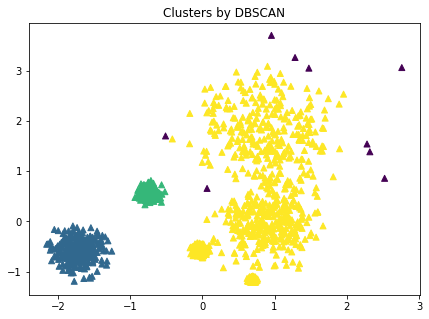

In [ ]:
DBmodel2_alt = DBSCAN(
          eps=0.3, # максимальна відстань між двома точками, щоб вважати їх сусідами.
          min_samples=4 # кількість сусідів, яка має бути у точки в цьому околі, щоб вважати її основною
          ).fit(X)    

number_of_clusters(DBmodel2_alt)
number_of_noise_pts(DBmodel2_alt)

metrics(X, y, DBmodel2_alt.labels_)
plot_clusters(X, DBmodel2_alt.labels_, colors='viridis')

Алгоритм DBSCAN є детермінованим, він завжди генерує одні й ті ж кластери, коли надаються ті самі дані в тому ж порядку. Однак результати можуть відрізнятися, якщо дані надаються в іншому порядку. Перевіримо це:

In [ ]:
shuffler = np.random.permutation(len(y))
X, y = X[shuffler],y[shuffler]
print(X)


[[-2.08607328 -0.49734504]
 [-0.04367185 -0.43196317]
 [-1.68786811 -0.49724618]
 ...
 [-0.02952747 -0.60403602]
 [ 0.70436927 -1.17245932]
 [ 0.94862091  1.49663494]]


Adjusted Mutual Info: 0.649
Silhouette Coefficient: 0.399
Calinski-Harabasz Index: 573.062


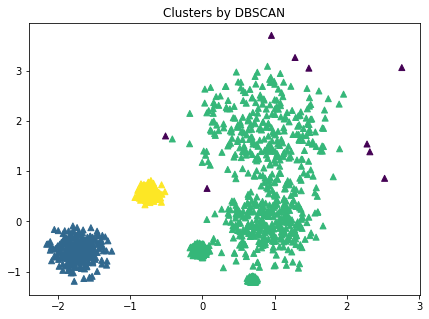

In [ ]:
DBmodel2_on_shuffled = DBSCAN(
          eps=0.3, # максимальна відстань між двома точками, щоб вважати їх сусідами.
          min_samples=4 # кількість сусідів, яка має бути у точки в цьому околі, щоб вважати її основною
          ).fit(X)    

metrics(X, y, DBmodel2_on_shuffled.labels_)
plot_clusters(X, DBmodel2_on_shuffled.labels_, colors='viridis')